# 📚Librerias

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import unicodedata
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

#  🔍Analisis Exploratorio

Para el Análisis Exploratorio de Datos , tenemos los siguientes enfoques principales:
1. **Limpieza de Datos:** Identificar y tratar datos ruidosos, nulos (faltantes), atípicos, o inconsistentes que puedan influir negativamente en el modelo de clasificación final.
2. **Comprensión del Contexto:** Conocer el comportamiento y la distribución de las variables, y la estructura de la información que compone nuestra base de datos.
3. **Identificación de Variables Clave:** Encontrar las variables más relevantes o predictivas que sean útiles a la hora de segmentar y explicar los patrones en los datos.

## 💾Importamos los DB

Los datos corresponden a los resultados de las Pruebas Saber Pro en Colombia, que evalúan la calidad de la educación superior. El conjunto incluye más de 690 mil estudiantes, con información académica (programa, indicadores de desempeño) y socioeconómica (estrato, acceso a internet, bienes del hogar, educación de los padres, forma de pago de matrícula).

El análisis busca depurar y explorar los datos para comprender los factores asociados al rendimiento global, con el fin de clasificar a los estudiantes según su desempeño. Este estudio es clave para identificar patrones, detectar desigualdades y aportar insumos a la toma de decisiones orientadas a mejorar la calidad y equidad en la educación superior.

### 📑 Diccionario de datos

- **ID:** Identificador único de cada estudiante (numérico entero).
- **PERIODO_ACADEMICO:** Año y periodo en el que el estudiante presentó la prueba, ej. 20252 = 2025, segundo semestre (numérico entero).
- **E_PRGM_ACADEMICO:** Programa académico en el que se encuentra matriculado el estudiante (categórico).
- **E_PRGM_DEPARTAMENTO:** Departamento académico o facultad a la que pertenece el programa (categórico).
- **E_VALORMATRICULAUNIVERSIDAD:** Valor de la matrícula pagada en la universidad (numérico continuo, puede tener faltantes).
- **E_HORASSEMANATRABAJA:** Número de horas que el estudiante trabaja a la semana (numérico continuo).
- **F_ESTRATOVIVIENDA:** Estrato socioeconómico de la vivienda del estudiante, valores típicos de 1 a 6 (categórico).
- **F_TIENEINTERNET:** Indica si el hogar del estudiante cuenta con acceso a internet (categórico: Sí/No).
- **F_EDUCACIONPADRE:** Nivel educativo alcanzado por el padre del estudiante (categórico: primaria, secundaria, universitaria, etc.).
- **F_TIENELAVADORA:** Indica si el hogar del estudiante posee lavadora (categórico: Sí/No).
- **F_TIENEAUTOMOVIL:** Indica si el hogar del estudiante posee automóvil (categórico: Sí/No).
- **E_PRIVADO_LIBERTAD:** Indica si el estudiante se encuentra privado de la libertad (categórico: Sí/No, usualmente “No”).
- **E_PAGOMATRICULAPROPIO:** Señala si el estudiante paga la matrícula con recursos propios (categórico: Sí/No).
- **F_TIENECOMPUTADOR:** Indica si el hogar del estudiante cuenta con computador (categórico: Sí/No).
- **F_TIENEINTERNET.1:** Indica si el hogar del estudiante cuenta con acceso a internet (categórico: Sí/No).
- **F_EDUCACIONMADRE:** Nivel educativo alcanzado por la madre del estudiante (categórico: primaria, secundaria, universitaria, etc.).
- **RENDIMIENTO_GLOBAL:** Medida resumen del desempeño del estudiante en la prueba (categórico: bajo, medio, alto, según codificación).
- **INDICADOR_1:** Indicador cuantitativo de desempeño académico específico (numérico continuo).
- **INDICADOR_2:** Indicador cuantitativo de desempeño académico específico (numérico continuo).
- **INDICADOR_3:** Indicador cuantitativo de desempeño académico específico (numérico continuo).
- **DICADOR_4:** Indicador cuantitativo de desempeño académico específico (numérico continuo).

In [3]:
df=pd.read_csv(r'C:\Users\Usuario\Documents\Trabajo Ingenieria Modelos\Bases de Datos\train.csv', encoding="utf-8")
df.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## 🧹Limpieza de Datos

### Datos Faltantes

🚩 Se observó que los registros de las características de los estudiantes presentan **datos faltantes (incompletos)**. Esta inconsistencia **podría afectar negativamente el rendimiento y la robustez** de los modelos de clasificación que se implementen.

Aunque **el impacto real dependerá del algoritmo seleccionado** y la estrategia de manejo de datos faltantes, esta situación se debe considerar como una **bandera roja** (o **riesgo potencial**) que requiere atención durante la fase de **preprocesamiento** o **modelado**.

In [4]:
df.info()                        # tipos y nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

En el siguiente resultado podemos ver la cantidad de datos faltantes y el porcentaje que representa sobre el número de registros totales.

In [5]:
# Tabla de nulos
nulos = df.isnull().sum().sort_values(ascending=False)
pct_nulos = (df.isnull().mean().sort_values(ascending=False) * 100).round(2)
pd.concat([nulos, pct_nulos], axis=1, keys=['# Faltantes','% del Total']).head(10)

,# Faltantes,% del Total
F_TIENEAUTOMOVIL,43623,6.30
F_TIENELAVADORA,39773,5.74
F_TIENECOMPUTADOR,38103,5.50
F_ESTRATOVIVIENDA,32137,4.64
E_HORASSEMANATRABAJA,30857,4.46
F_TIENEINTERNET,26629,3.85
F_TIENEINTERNET.1,26629,3.85
F_EDUCACIONMADRE,23664,3.42
F_EDUCACIONPADRE,23178,3.35
E_PAGOMATRICULAPROPIO,6498,0.94


### Datos Duplicados

Al describir las variables (características) del conjunto de datos, se identificaron dos columnas relacionadas con la conectividad a Internet de los estudiantes. Dado que esta dualidad sugiere **redundancia potencial** en la información, se procederá a realizar una verificación.

Mediante la siguiente línea de código, se evaluará si ambas columnas almacenan **información equivalente o idéntica**. En caso de confirmar la redundancia, una de las dos variables será **conservada** y la otra será **eliminada** para simplificar el modelo y evitar problemas de **multicolinealidad**.

In [6]:
if df['F_TIENEINTERNET'].equals(df['F_TIENEINTERNET.1']):
    df = df.drop(columns=['F_TIENEINTERNET.1'])
    print("Se elimino la variable F_TIENEINTERNET.1")

Se elimino la variable F_TIENEINTERNET.1


### Tipo de Variable

A pesar de haber sido importada con un tipo de dato numérico (float o int), su naturaleza intrínseca es **ordinal**, ya que su función es **identificar el momento temporal** específico en que el estudiante presentó la prueba ICFES. Dado que los períodos no representan una magnitud cuantitativa para el modelado, sino una **etiqueta de tiempo**, se tratará como una variable discreta para evitar interpretaciones erróneas en los modelos. 

In [7]:
# Convertir PERIODO_ACADEMICO a categórica
df["PERIODO_ACADEMICO"] = df["PERIODO_ACADEMICO"].astype(str)
df["PERIODO_ACADEMICO"] = df["PERIODO_ACADEMICO"].astype("category")

### Caracteres Especiales

Al examinar la variable categórica E_PRGM_ACADEMICO, que registra el programa académico del estudiante, se identificó un problema de **inconsistencia en la codificación de texto**.

Por ejemplo, las entradas "ADMINISTRACION DE EMPRESAS" y "ADMINISTRACIÓN DE EMPRESAS" son interpretadas por el lenguaje de programación como **categorías distinta**s debido a la presencia de la tilde ('Ó').

Para resolver esta **fragmentación categórica** y asegurar que categorías conceptualmente idénticas sean tratadas como una sola, se implementó una estrategia de **normalización de texto**. Esta consiste en **eliminar los caracteres especiales** (diacríticos), es decir, **reemplazar todas las vocales tildadas por sus análogos sin tilde**. Este procedimiento homogeniza las etiquetas y simplifica el análisis.

In [22]:
def quitar_tildes(texto):
    if isinstance(texto, str):
        texto = unicodedata.normalize("NFD", texto)
        texto = "".join(c for c in texto if unicodedata.category(c) != "Mn")
        return texto.upper()  
    return texto

df["E_PRGM_ACADEMICO"] = df["E_PRGM_ACADEMICO"].apply(quitar_tildes)
print("Homogeneización Realizada")

Homogeneización Realizada


## 📊Entendiendo los datos

### 📈Variables Continuas/Numéricas

Para este análisis, **se excluye** las variables ID de la consideración como variables numéricas. 

Aunque estas columna fue catalogada por Python con una tipología numérica (float64), **su naturaleza real es la de variable categórica o identificadora** (nominales u ordinales). Incluirlas como variables continuas distorsionaría el análisis.

Por lo tanto, **las únicas variables numéricas reales (cuantitativas)** utilizadas en el conjunto de datos son los cuatro indicadores descritos previamente.

- **Indicadores 1 y 2: Distribución y Dispersión:** Los Indicadores 1 y 2 presentan una **distribución multimodal**, lo que indica la presencia de distintas **subpoblaciones** o patrones de concentración dentro de los datos. Esta naturaleza se traduce en la **mayor dispersión** y **alta variabilidad** del conjunto, reflejándose también en el rango de valores más amplio en comparación con los demás indicadores.

- **Indicadores 3 y 4: Asimetría y Concentración:** Los Indicadores 3 y 4 exhiben una marcada **asimetría negativa** (o sesgo hacia la izquierda), concentrando la mayor masa de datos en los valores superiores de su rango. El Indicador 3 muestra un patrón más **polarizado**, con una densidad predominante en el extremo superior y una pequeña acumulación secundaria cerca de cero. Por otro lado, la densidad del Indicador 4 también se concentra en valores altos, pero decae de forma **más gradual** hacia el extremo inferior.

📊 Estadísticos descriptivos de indicadores:
                count      mean       std  min    25%    50%    75%    max
INDICADOR_1  692500.0  0.268629  0.122130  0.0  0.203  0.240  0.314  0.657
INDICADOR_2  692500.0  0.259996  0.093480  0.0  0.212  0.271  0.309  0.487
INDICADOR_3  692500.0  0.262087  0.058862  0.0  0.254  0.276  0.293  0.320
INDICADOR_4  692500.0  0.262903  0.067944  0.0  0.255  0.285  0.303  0.332


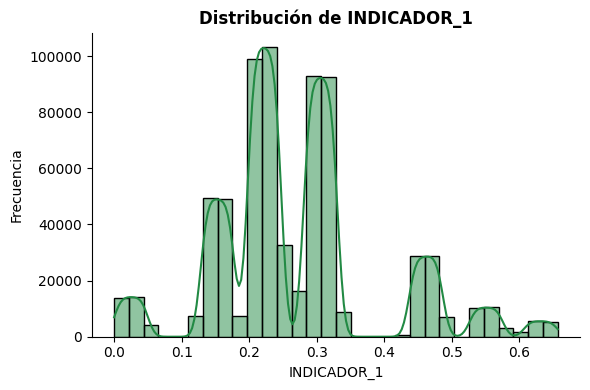

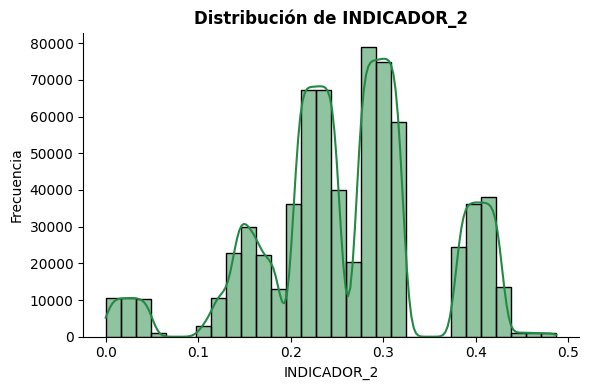

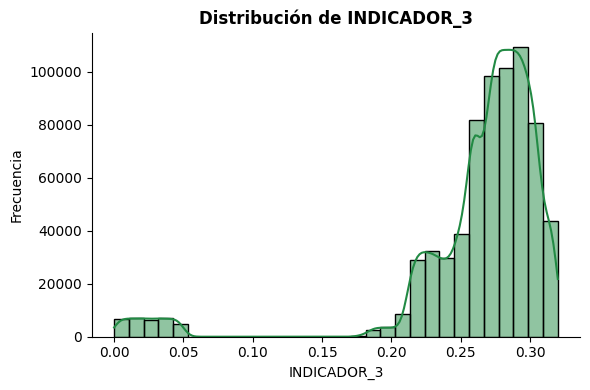

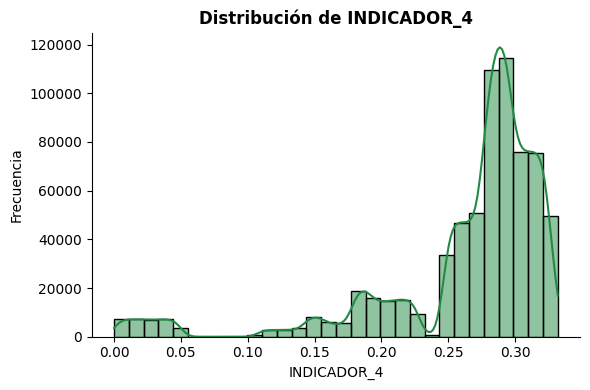

In [45]:
num_vars  = ["INDICADOR_1", "INDICADOR_2", "INDICADOR_3", "INDICADOR_4"]

# Estadísticos descriptivos
print("📊 Estadísticos descriptivos de indicadores:")
print(df[num_vars].describe().T)

green = sns.color_palette("Greens", n_colors=3)[-1]  # tomo el verde más oscuro

for col in num_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color=green)
    plt.title(f"Distribución de {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    sns.despine()
    plt.tight_layout()
    plt.show()

### 🏷️Variables Categóricas

Se analizaron **14 variables categóricas** clave que permiten comprender el **perfil socioeconómico y académico** de los estudiantes.

- 🗓️**Perfil Académico y Temporal** 
    - **Periodo Evaluativo:** El conjunto de datos abarca nueve (9) periodos de evaluación distintos. El año 2019 fue el que concentró la mayor cantidad de periodos. Específicamente, el periodo 20195 registró la mayor frecuencia de presentación del examen, mientras que el periodo 20196 tuvo la menor participación.

    - **Programa Académico:** Se identificaron 786 categorías únicas para los programas académicos. La categoría más frecuente y popular es "Administración de Empresas".

    - **Ubicación:** Los estudiantes se encuentran matriculados mayoritariamente en instituciones ubicadas en Bogotá. Los programas académicos provienen de 31 regiones distintas.

- 💵**Perfil Socioeconómico y Financiero** 
    - **Estrato Socioeconómico:** Los estratos 2 y 3 son los más comunes, representando el 67.1% de la población estudiantil.

    - **Valor de la Matrícula:** El valor de la matrícula universitaria se concentra mayoritariamente en el rango de $1,000,000 a $2,500,000.

    - **Estrato Socioeconómico:** Los estratos más comunes son el 2 y el 3, los cuales representan el 67.1% de la población estudiantil registrada.

    - **Financiación:** El 55.7% de los estudiantes asume el pago de su propia matrícula.

    - **Situación Laboral:** La mayoría de los estudiantes trabaja (ya sea a tiempo parcial o tiempo completo).

    - **Nivel Educativo de los Padres:** El nivel educativo más frecuente para ambos padres se concentra en haber completado la secundaria o haber dejado incompleta la primaria.

- 🏠**Posesiones y Acceso a Bienes** 
    - **Acceso a Internet:** Un alto porcentaje, el 89% de los estudiantes, reporta tener acceso a Internet.
    - **Tenencia de Computador:** Una abrumadora mayoría, el 91.3% de los estudiantes, posee un computador.

    - **Tenencia de Lavadora:** La mayoría de los estudiantes reporta tener lavadora en su hogar.

    - **Tenencia de Automóvil:** La mayoría de los estudiantes no tiene automóvil, representando el 63.6% de los registros, frente al 36.4% que sí lo tiene.

- 🧩**Población Especial** 
    - **Población Especial (Privados de la Libertad):** Se identificó un porcentaje mínimo de estudiantes clasificados como privados de la libertad, sumando 34 casos en total.

In [ ]:
categ_vars = [
    "PERIODO_ACADEMICO",       
    "E_PRGM_ACADEMICO", 
    "E_PRGM_DEPARTAMENTO",
    "E_VALORMATRICULAUNIVERSIDAD", 
    "E_HORASSEMANATRABAJA",
    "F_ESTRATOVIVIENDA", 
    "F_TIENEINTERNET",
    "F_EDUCACIONPADRE", 
    "F_TIENELAVADORA",
    "F_TIENEAUTOMOVIL", 
    "E_PRIVADO_LIBERTAD",
    "E_PAGOMATRICULAPROPIO", 
    "F_TIENECOMPUTADOR",
    "F_EDUCACIONMADRE"
]

categorias_unicas = {col: df[col].nunique() for col in categ_vars}
categorias_df = pd.DataFrame.from_dict(categorias_unicas, orient="index", columns=["N° Categorías"])
categorias_df = categorias_df.sort_values(by="N° Categorías", ascending=False)
categorias_df

,N° Categorías
E_PRGM_ACADEMICO,786
E_PRGM_DEPARTAMENTO,31
F_EDUCACIONPADRE,12
F_EDUCACIONMADRE,12
PERIODO_ACADEMICO,9
E_VALORMATRICULAUNIVERSIDAD,8
F_ESTRATOVIVIENDA,7
E_HORASSEMANATRABAJA,5
F_TIENEINTERNET,2
F_TIENELAVADORA,2


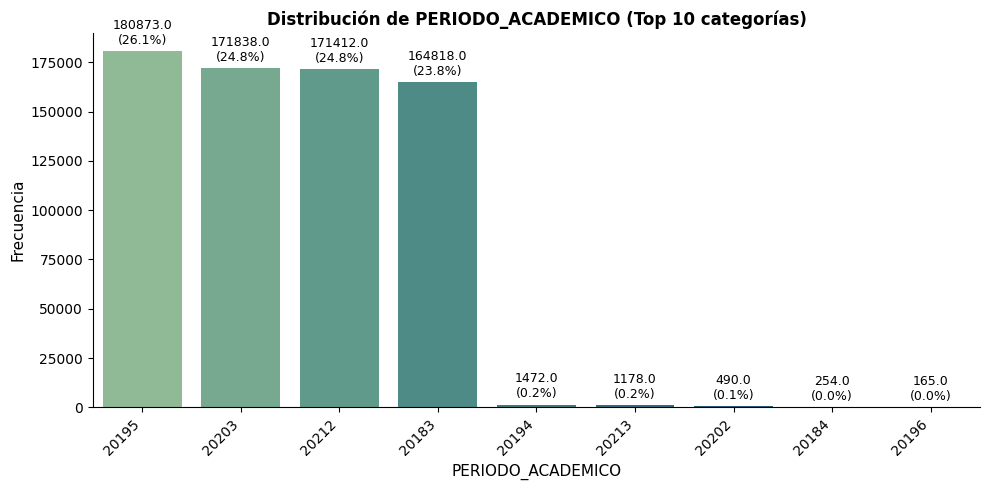

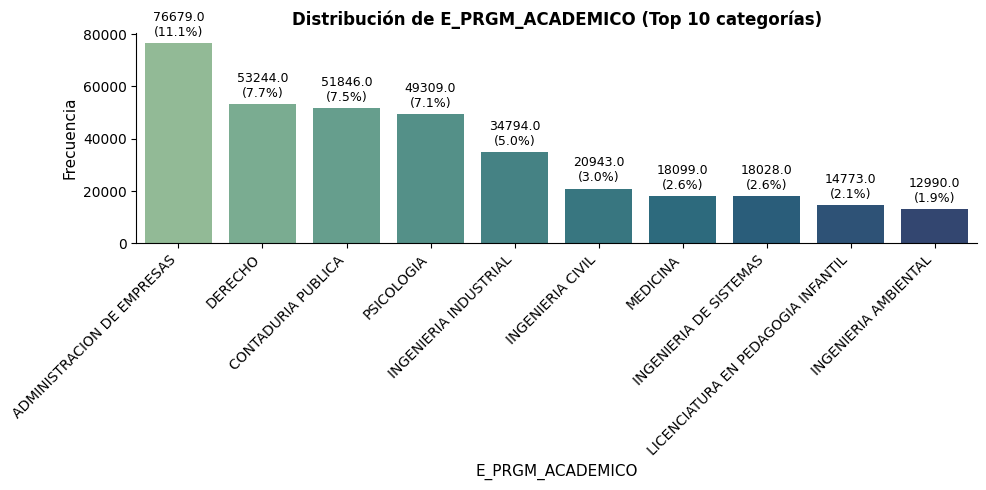

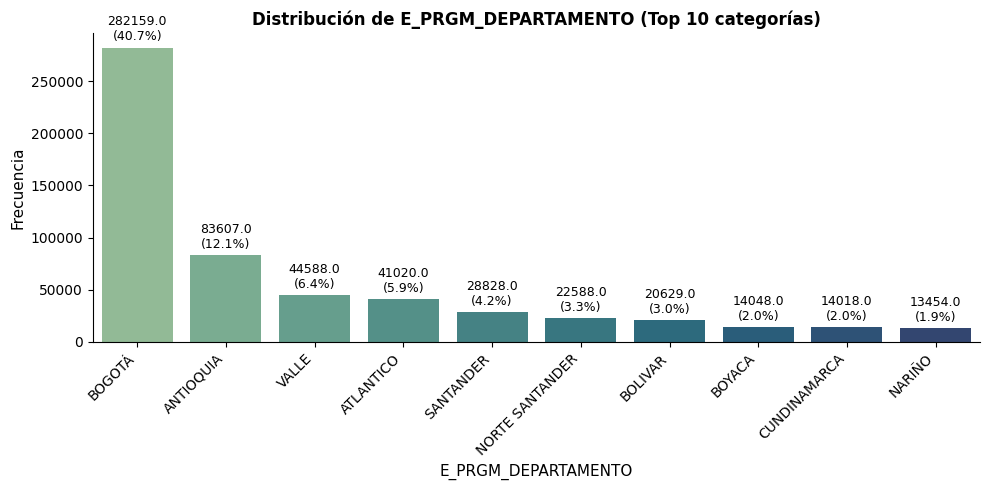

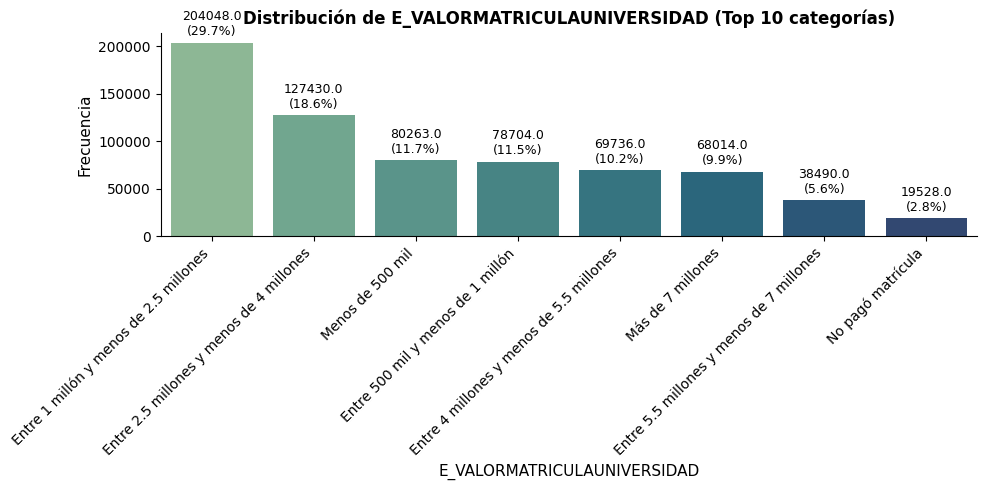

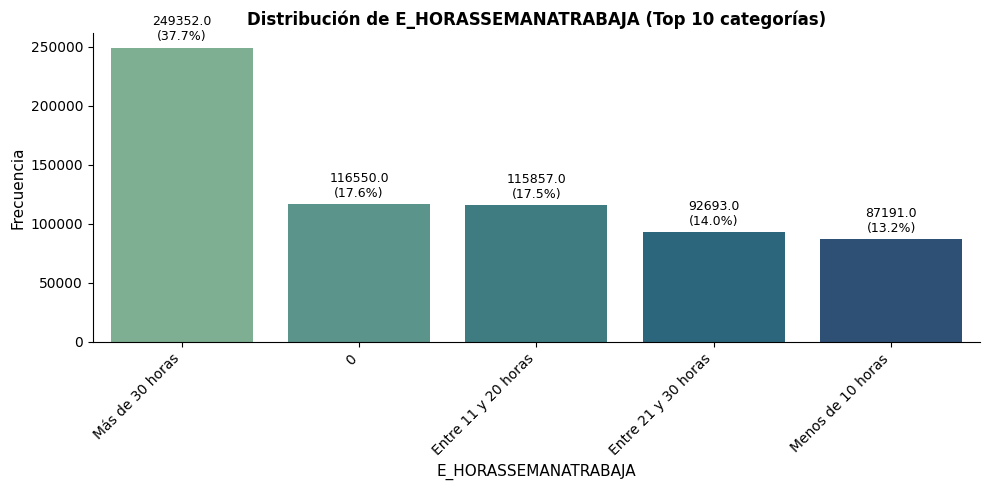

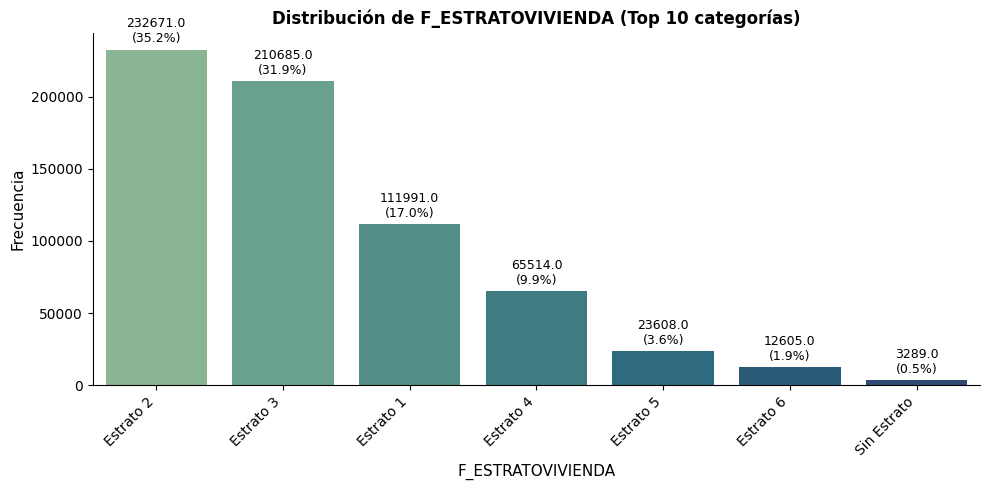

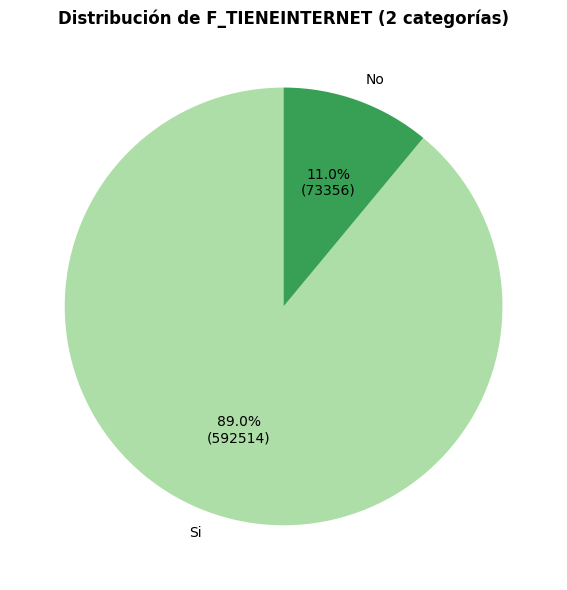

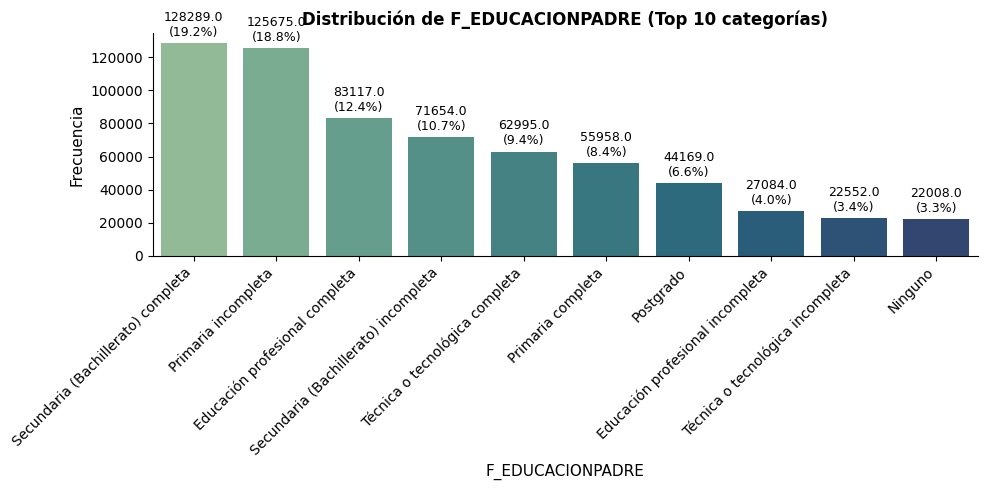

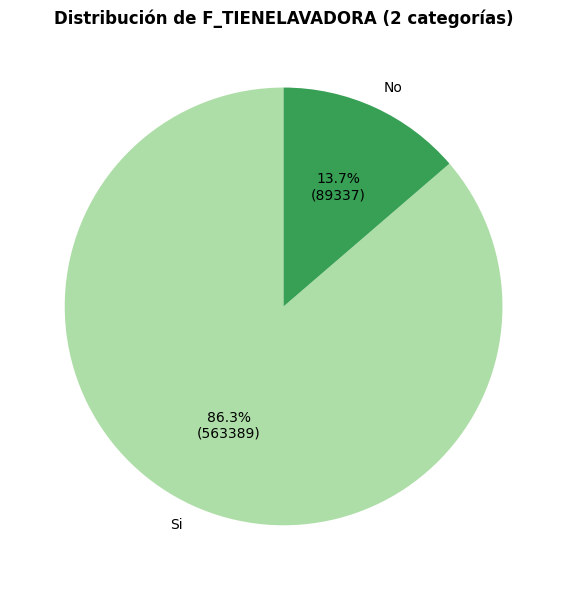

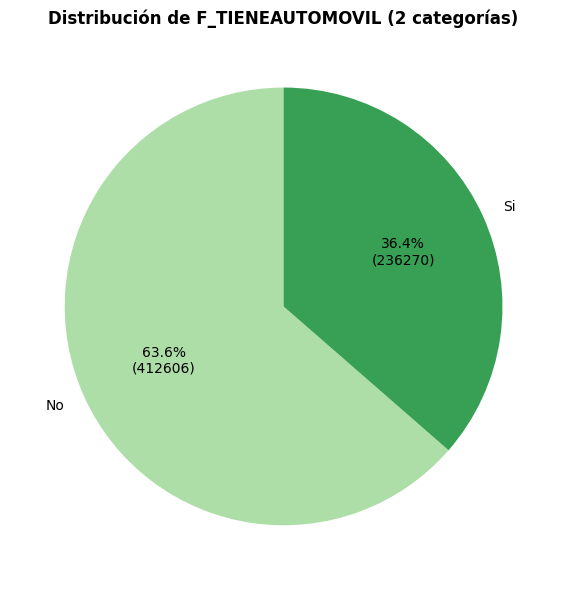

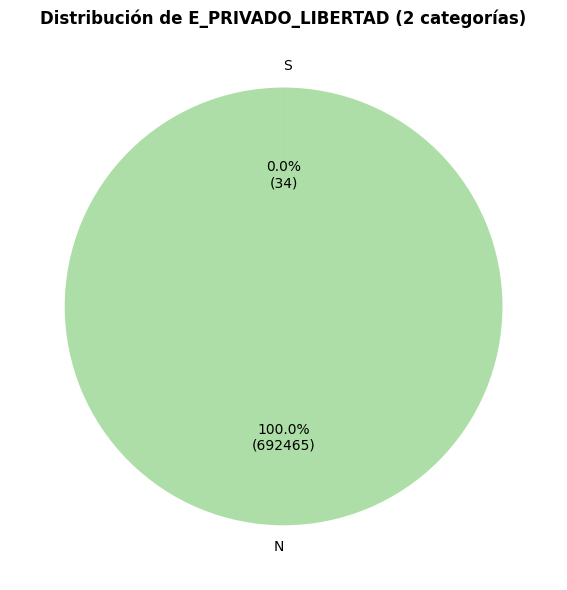

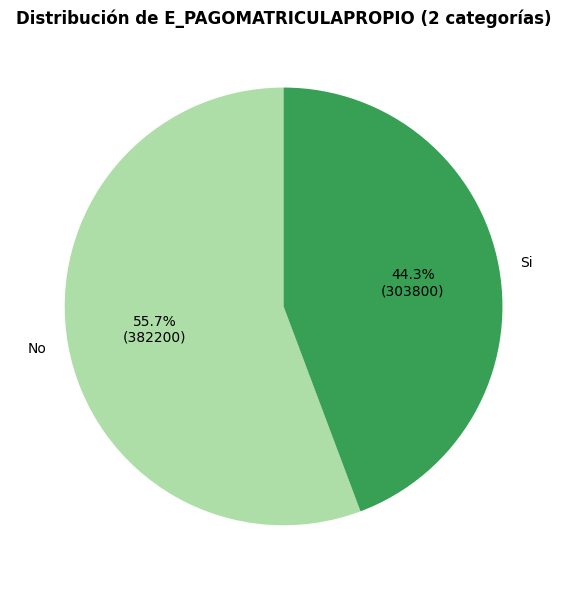

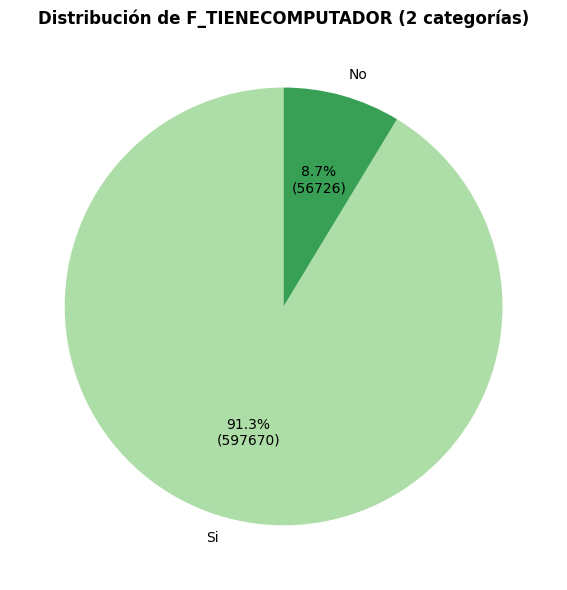

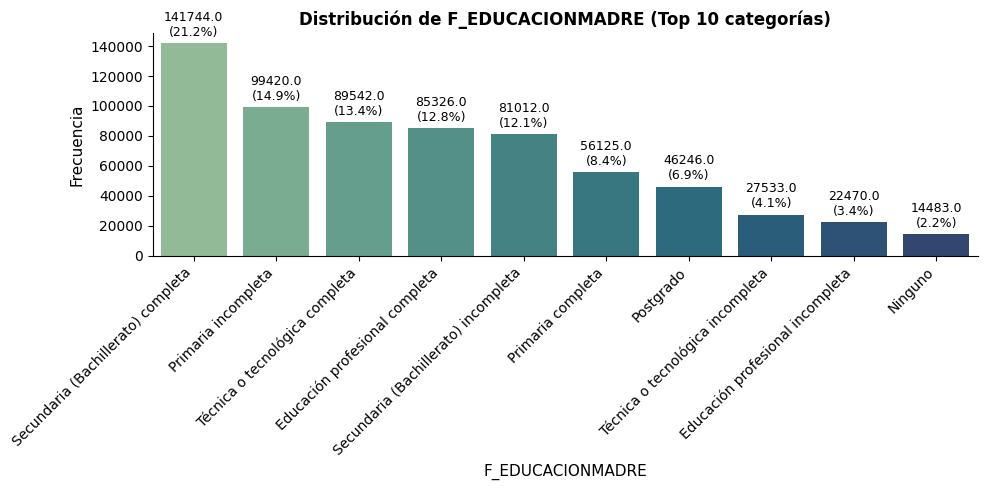

In [30]:
for col in categ_vars:
    n_cats = df[col].nunique()
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, "Frecuencia"]
    
    if n_cats == 2:
        # === Pie chart ===
        plt.figure(figsize=(6,6))
        colors = sns.color_palette("Greens", n_colors=n_cats)  # tonos verdes
        plt.pie(
            counts["Frecuencia"], 
            labels=counts[col], 
            autopct=lambda p: f'{p:.1f}%\n({int(p*sum(counts["Frecuencia"])/100)})',
            colors=colors,
            startangle=90
        )
        plt.title(f"Distribución de {col} (2 categorías)", fontsize=12, fontweight="bold")
        plt.tight_layout()
        plt.show()
        
    else:
        # === Barplot (Top 10) ===
        plt.figure(figsize=(10,5))
        counts_top = counts.head(10)
        
        ax = sns.barplot(
            data=counts_top,
            x=col,
            y="Frecuencia",
            palette="crest"
        )
        
        # Etiquetas con frecuencia y porcentaje
        total = counts["Frecuencia"].sum()
        for container in ax.containers:
            ax.bar_label(
                container, 
                labels=[f'{v}\n({v/total:.1%})' for v in container.datavalues],
                label_type='edge',
                fontsize=9, 
                padding=3
            )
        
        # Estética
        plt.title(f"Distribución de {col} (Top 10 categorías)", fontsize=12, fontweight="bold")
        plt.xticks(rotation=45, ha="right")
        plt.xlabel(col, fontsize=11)
        plt.ylabel("Frecuencia", fontsize=11)
        sns.despine()
        plt.tight_layout()
        plt.show()


## 🎯Variables Clave

El **objetivo final** de este estudio es desarrollar un modelo predictivo capaz de **clasificar la variable RENDIMIENTO_GLOBAL**.

Para alcanzar este propósito, es fundamental no solo comprender la **distribución intrínseca** de la variable objetivo, sino también su **relación y comportamiento conjunto** con las demás variables **categóricas y numéricas**.

Esta aproximación descriptiva inicial permitirá **identificar patrones, tendencias y posibles segmentaciones** que serán esenciales para la **construcción y optimización** del modelo de clasificación.

### Análisis Univariado

Para construir un modelo de clasificación robusto, es crucial asegurar la **homogeneidad** o **balance** en la distribución de las categorías de la variable objetivo. Un desbalance de clases significativo puede sesgar el modelo, afectando negativamente su capacidad predictiva.

En este caso, la variable objetivo, RENDIMIENTO_GLOBAL, se compone de cuatro categorías (Bajo, Medio-Bajo, Medio-Alto, Alto) que presentan una **proporción de aparición similar**. Dado que los porcentajes de cada clase se encuentran alrededor del **25%**, se considera que el conjunto de datos está **bien balanceado**, lo cual es una condición deseable para la fase de modelado.

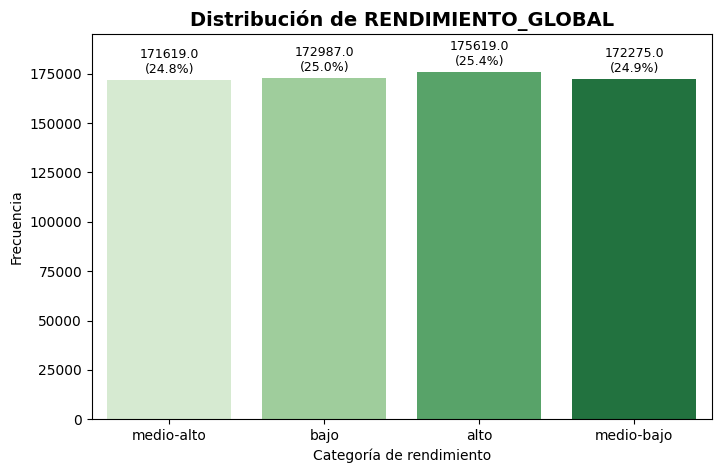

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="RENDIMIENTO_GLOBAL", data=df, palette="Greens")

# Etiquetas con frecuencia y %
total = len(df)
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{v}\n({v/total:.1%})" for v in container.datavalues],
        fontsize=9,
        padding=3
    )

plt.title("Distribución de RENDIMIENTO_GLOBAL", fontsize=14, fontweight="bold")
plt.xlabel("Categoría de rendimiento")
plt.ylabel("Frecuencia")

# 🔹 Ajuste manual del eje Y
plt.ylim(0, 195000)
plt.show()

### Relación con variables numéricas

El **Indicador 1** exhibe una clara distinción en el **Rendimiento Alto**, cuya mediana y **concentración** (Rango Intercuartílico) se ubican notablemente más cerca de 0.3 y es la única categoría que **no presenta valores atípicos**; las demás categorías se concentran alrededor de 0.2 y sí tienen outliers. El **Indicador 2** es singular debido a la **ausencia de valores atípicos** exclusivamente en el **Rendimiento Bajo**, lo cual no se observa en el resto de los grupos. En contraste, el **Indicador 3** muestra un comportamiento marcadamente **homogéneo** entre todas las categorías de rendimiento, sugiriendo una baja capacidad discriminatoria. Finalmente, el **Indicador 4** se distingue por la **mayor dispersión y rango intercuartílico** de los datos centrales en la categoría de **Rendimiento Alto**.

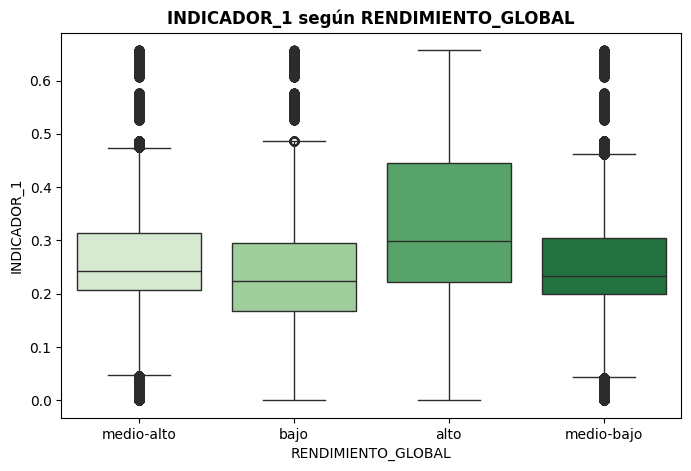

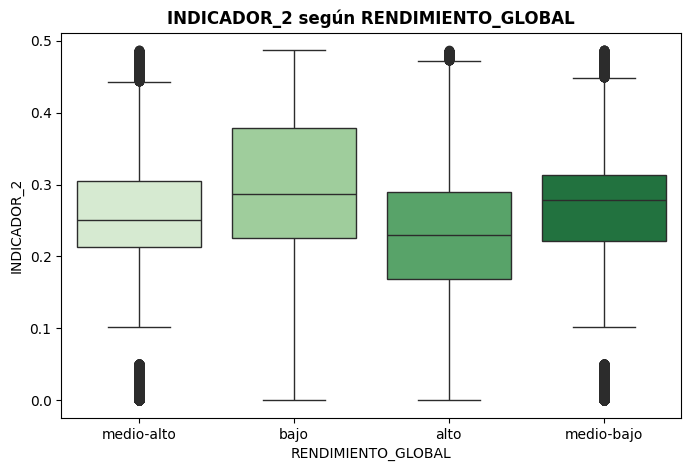

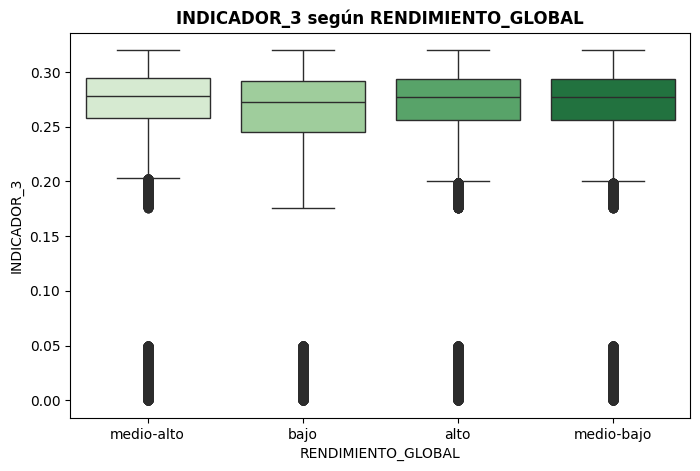

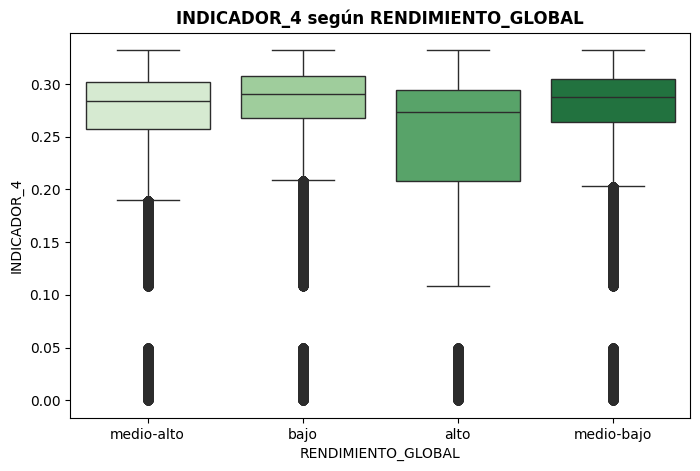

In [46]:
for col in num_vars:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="RENDIMIENTO_GLOBAL", y=col, data=df, palette="Greens")
    plt.title(f"{col} según RENDIMIENTO_GLOBAL", fontsize=12, fontweight="bold")
    plt.show()

### Relación con variables categóricas

- 🟢**Perfil de Rendimiento Alto** : Los estudiantes con Rendimiento Alto tienden a tener un perfil socioeconómico más favorable y una menor necesidad de auto-financiación. Es más común que **no trabajen** o que trabajen menos horas, lo que les permite enfocarse en sus estudios. Financieramente, suelen pertenecer a estratos altos o intermedios y pagan **las matrículas más costosas** (ej., superiores a $7 millones). Poseen un acceso tecnológico completo, incluyendo **Internet, computador y automóvil**. A nivel familiar, es frecuente que el padre tenga un **alto nivel de educación profesional completo**. Curiosamente, este rendimiento es más común en estudiantes que **no pagan su propia matrícula** (lo que sugiere becas o apoyo familiar).

- 🔴**Perfil de Rendimiento Bajo/Medio-Bajo** : El perfil de **Rendimiento Bajo** se asocia fuertemente con factores socioeconómicos más limitantes. Estos estudiantes son **más comunes en los Estratos 1 y 2** y pagan las **matrículas intermedias-bajas** ($1 millón a $2.5 millones). La necesidad económica es evidente: es más común que **trabajen más de 30 horas** a la semana y que **auto-financien su matrícula**. Presentan un menor acceso a bienes y tecnología (ej., **no tienen Internet o automóvil**). A nivel familiar, el bajo rendimiento está ligado a que el padre tenga un **nivel de educación bajo** (ej., primaria incompleta). Además, este perfil es notablemente más frecuente entre los estudiantes matriculados en el programa de **Administración de Empresas**. 

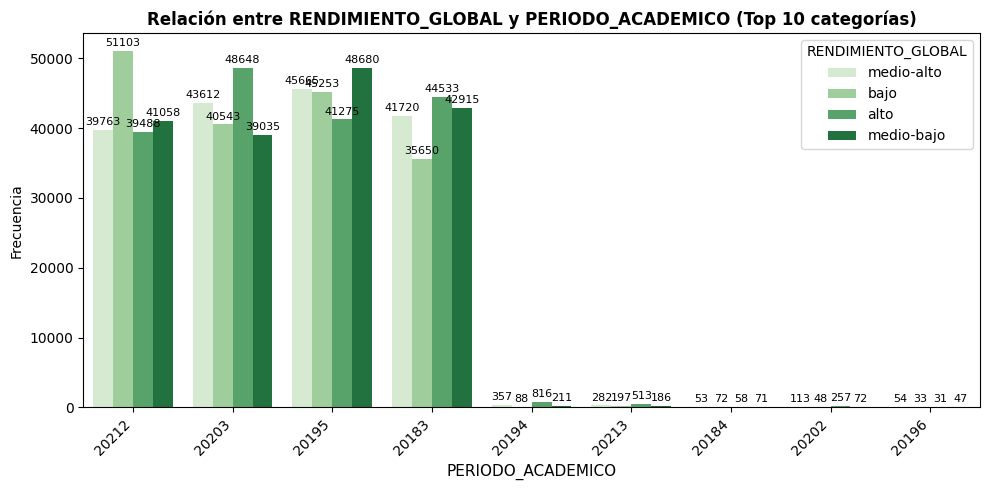

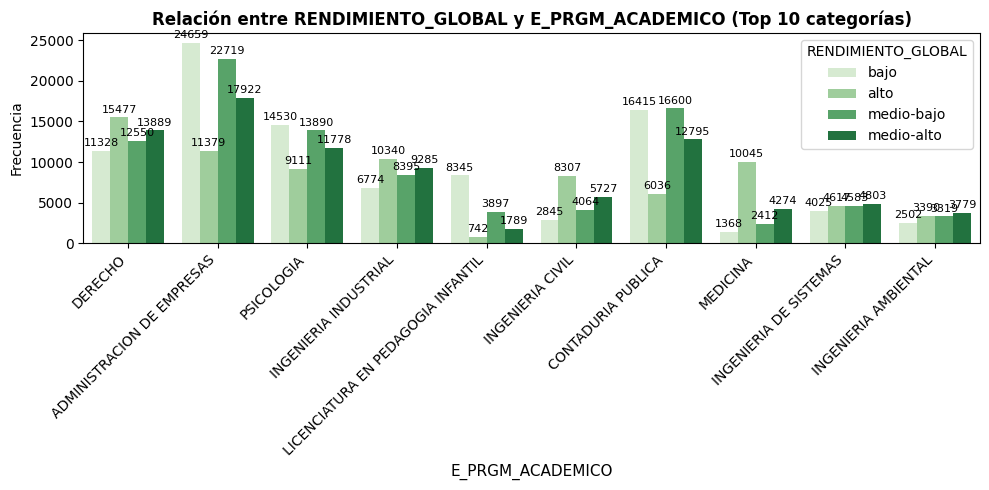

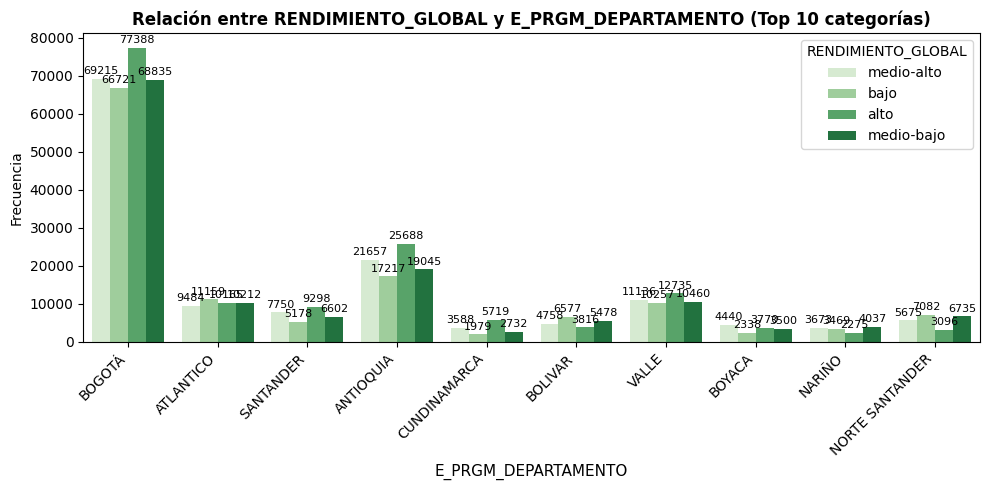

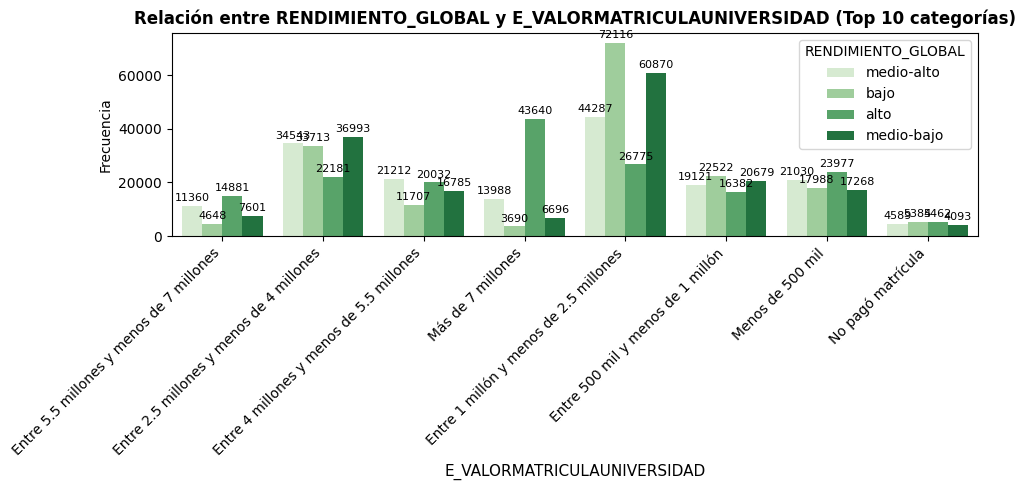

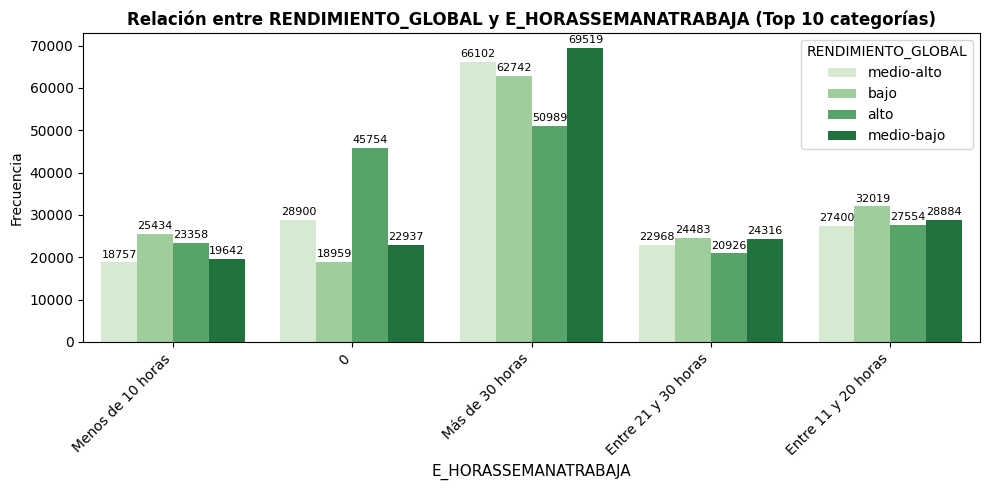

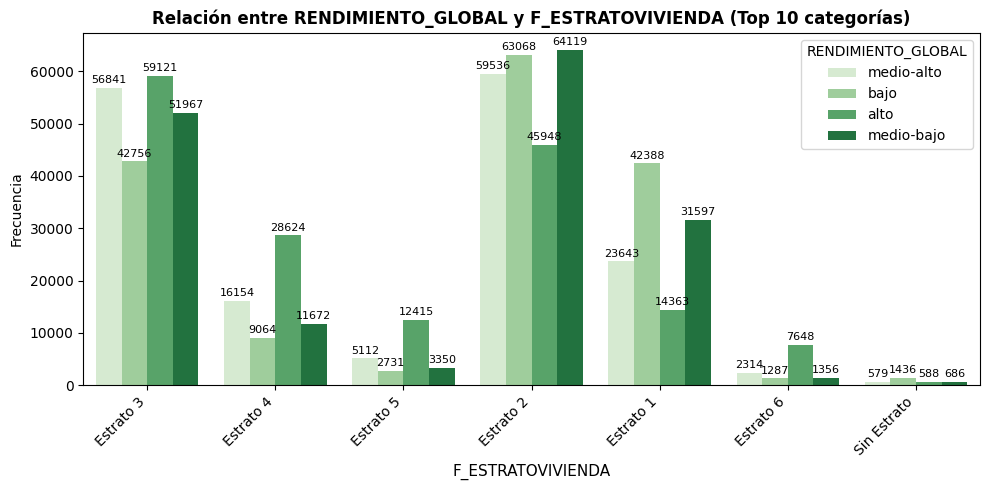

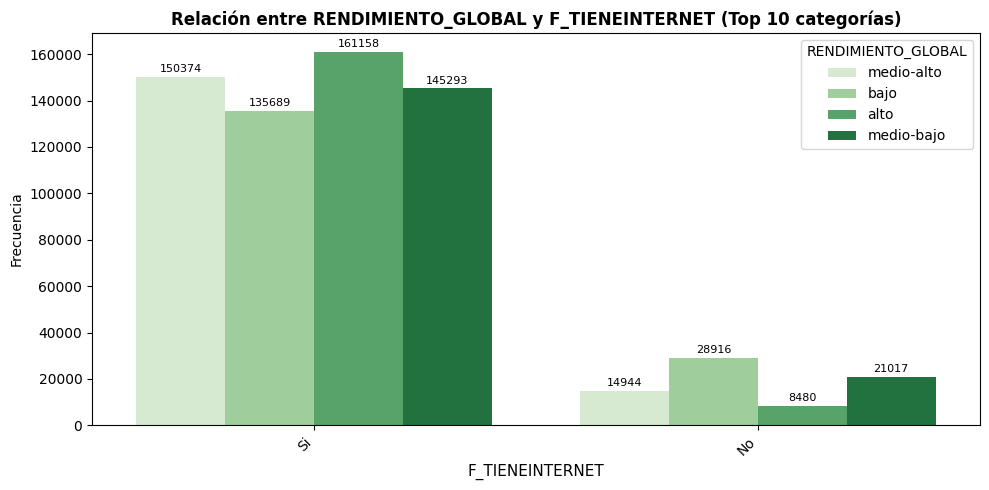

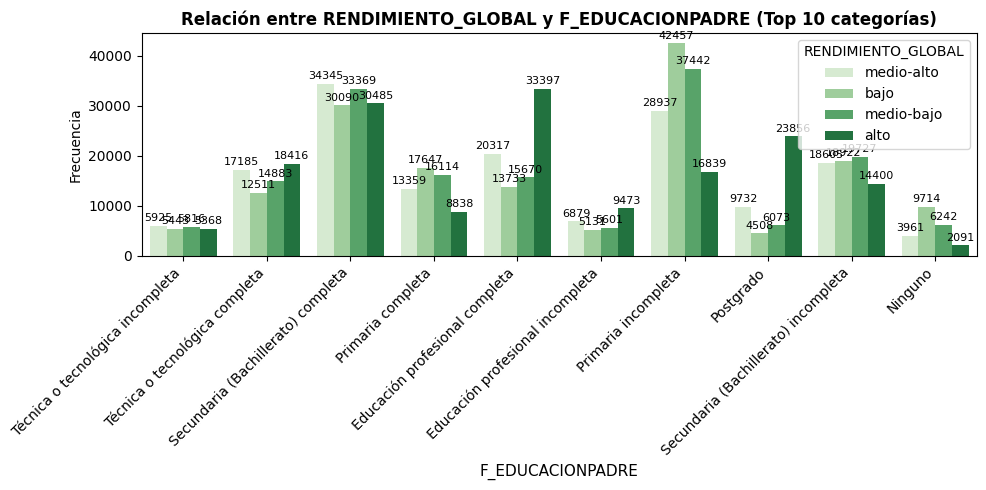

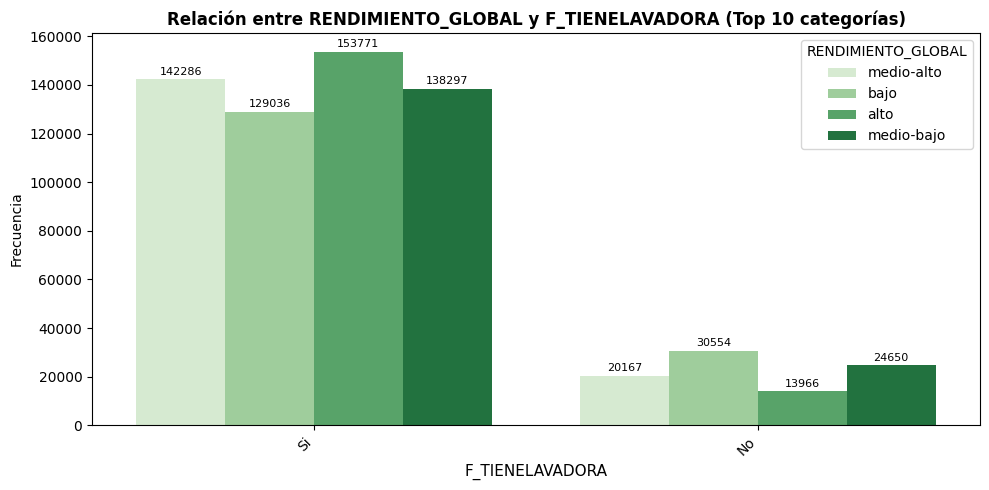

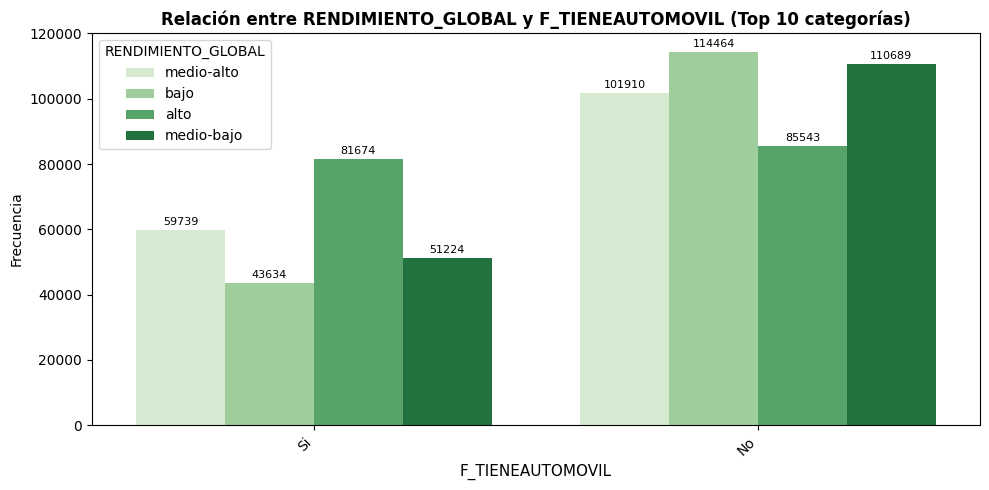

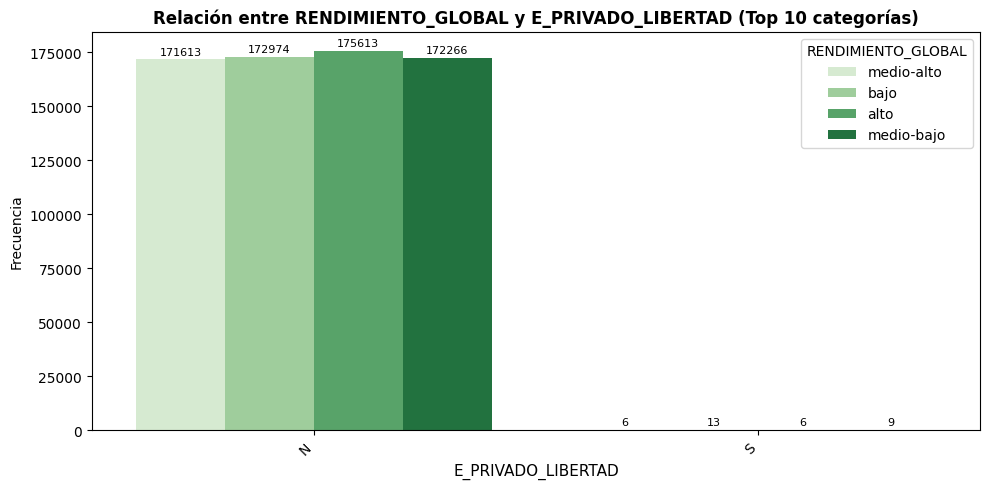

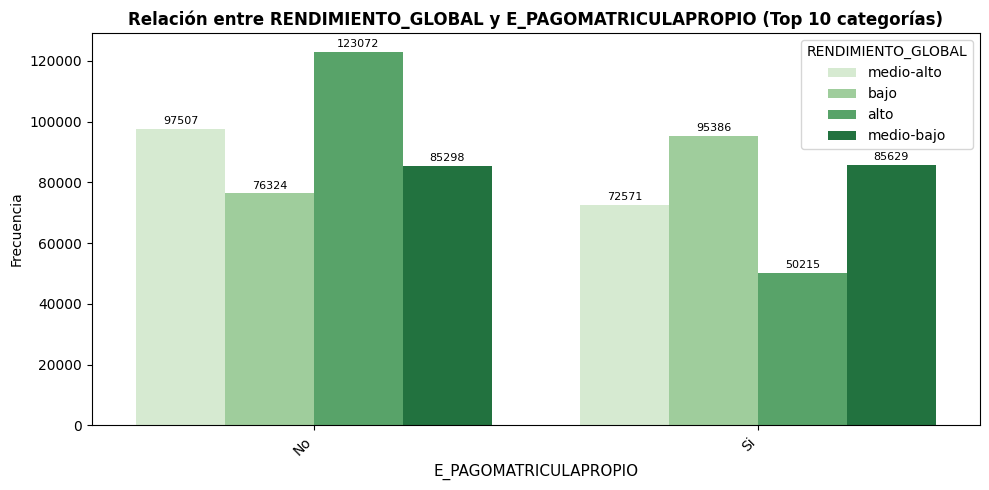

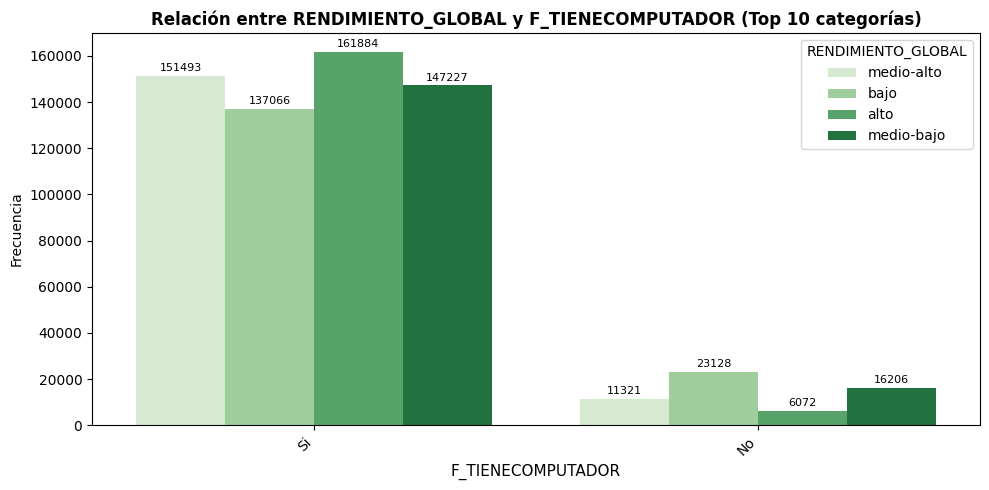

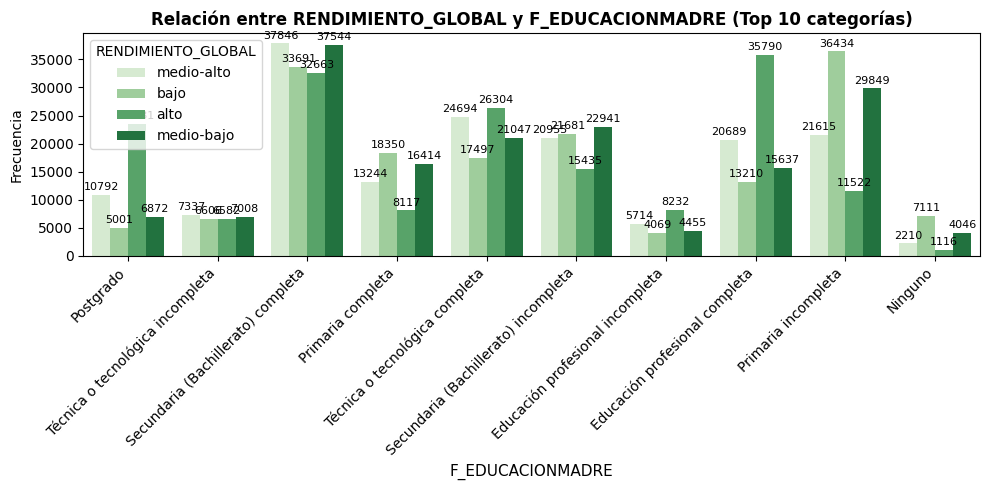

In [40]:
for col in categ_vars:
    plt.figure(figsize=(10,5))
    
    # Calcular top 10 categorías
    top_10 = df[col].value_counts().head(10).index
    data_top = df[df[col].isin(top_10)]
    
    ax = sns.countplot(
        data=data_top,
        x=col,
        hue="RENDIMIENTO_GLOBAL",   # relación con la variable de interés
        palette="Greens"
    )
    
    # Etiquetas con frecuencia en cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=8, padding=2)
    
    plt.title(f"Relación entre RENDIMIENTO_GLOBAL y {col} (Top 10 categorías)", 
              fontsize=12, fontweight="bold")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()



### Conclusión sobre las variables clave

- Los **indicadores numéricos** muestran diferencias relevantes entre categorías de rendimiento:

    - El **Indicador 1** y el **Indicador 2** sí aportan información discriminante, pues permiten diferenciar entre estudiantes de rendimiento alto y bajo, especialmente por la concentración de los datos y la presencia o ausencia de valores atípicos.

    - El **Indicador 3** presenta un patrón homogéneo entre categorías, lo que lo hace poco útil como predictor.

    - El **Indicador 4** resalta por su dispersión en el grupo de Rendimiento Alto, sugiriendo que es una variable con capacidad explicativa pero menos estable.

- En las **variables categóricas socioeconómicas y académicas** se observa una clara asociación entre el rendimiento y el contexto del estudiante:

    - **Rendimiento Alto** se vincula con condiciones más favorables: menos horas de trabajo, mayor nivel educativo de los padres, matrículas más altas, mayor acceso a tecnología y apoyo familiar en el pago de matrícula.

    - **Rendimiento Bajo/Medio-Bajo** se relaciona con factores de vulnerabilidad: estratos socioeconómicos bajos, necesidad de trabajar muchas horas, auto-financiación de matrícula, bajo nivel educativo de los padres y menor acceso a recursos tecnológicos.